In [21]:
import keras
import numpy as np
from keras.datasets import mnist

In [22]:
(train_images,train_labels ), (test_images, test_labels) = mnist.load_data()

In [23]:
print(train_images.ndim)

3


In [24]:
print(test_images.shape)
print(train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


In [25]:
print(train_images.dtype)

uint8


In [26]:
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [27]:
my_slice=test_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [28]:
my_slice=train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice=train_images[:,14:,14:]
my_slice.shape

(60000, 14, 14)

In [30]:
my_slice=train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

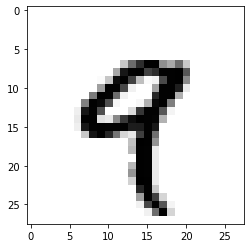

In [31]:
digit=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [32]:
# from keras.layers import Dense, Dropout 
# from tensorflow.keras.optimizers import RMSprop
from keras import models
from keras import layers

# network = models.Sequential()
# # network.add(Dense(512, activation='sigmoid', input_shape = (784,))) 
# # network.add(Dropout(0.2)) 
# # network.add(Dense(512, activation = 'sigmoid')) 
# # network.add(Dropout(0.2)) 
# # network.add(Dense(10, activation = 'softmax'))
# network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# network.add(layers.Dense(10, activation='softmax'))

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [33]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [35]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255


In [36]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [37]:
network.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2204 - accuracy: 0.9351
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0916 - accuracy: 0.9728
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0620 - accuracy: 0.9815
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0472 - accuracy: 0.9860
Epoch 5/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0355 - accuracy: 0.9897


In [42]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0769 - accuracy: 0.9795
test_acc: 0.9794999957084656


In [40]:
x=np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80.4,36,2]],
            [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80.4,36,2]],
            [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80.4,36,2]]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


In [41]:
x.ndim

2